In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/MyDrive/182/procgen/christian/train_procgen_pfrl/

/gdrive/.shortcut-targets-by-id/1KclNT8oLc6BuSs41C51763dlfemygH-V/procgen/christian/train_procgen_pfrl


In [3]:
! pip install -r requirements.txt

     |████████████████████████████████| 39.9MB 1.5MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 22.2MB 50.0MB/s 
     |████████████████████████████████| 675kB 32.6MB/s 
     |████████████████████████████████| 204kB 43.7MB/s 
     |████████████████████████████████| 3.3MB 29.8MB/s 
     |████████████████████████████████| 40kB 4.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [4]:
! pip install pfrl

     |████████████████████████████████| 112kB 5.1MB/s 
  Created wheel for pfrl: filename=pfrl-0.2.1-cp37-none-any.whl size=153478 sha256=07c2ead9c8af7d78ff1d647a9034291d08a33cad3aa2c628e758019b2a67df7d
  Stored in directory: /root/.cache/pip/wheels/10/22/cf/8da3465e0b3f7a915241dd5edd3d5d684ac62fb2ec57c25316
Successfully built pfrl


In [5]:
from policies_ADAM import ImpalaCNN, TMPNet_template_init
from procgen import ProcgenEnv
from vec_env import VecExtractDictObs
from vec_env import VecMonitor
from vec_env import VecNormalize
import torch

In [6]:
venv = ProcgenEnv(
    num_envs=1,
    env_name='fruitbot',
    num_levels=0,
    start_level=0,
    distribution_mode='easy',
    num_threads=1,
)
venv = VecExtractDictObs(venv, "rgb")
venv = VecMonitor(venv=venv, filename=None, keep_buf=100)
venv = VecNormalize(venv=venv, ob=False)

In [7]:
model = TMPNet_template_init(
    obs_space=venv.observation_space,
    num_outputs=venv.action_space.n,
    d = torch.device('cpu'),
    impala_layer_init=1,
    init_style='fragment',
    init_all_input_channels=True
)

100%|██████████| 20/20 [00:14<00:00,  1.42it/s]


torch.Size([180, 3, 3, 3])
initing impala layer 1 with style fragment
in_idx [22  9 24 20  9  7 10  1  5  4 24  7 12  5 23 19  5 14 21  3 21 26  9 21
 20 22]
init impala layer


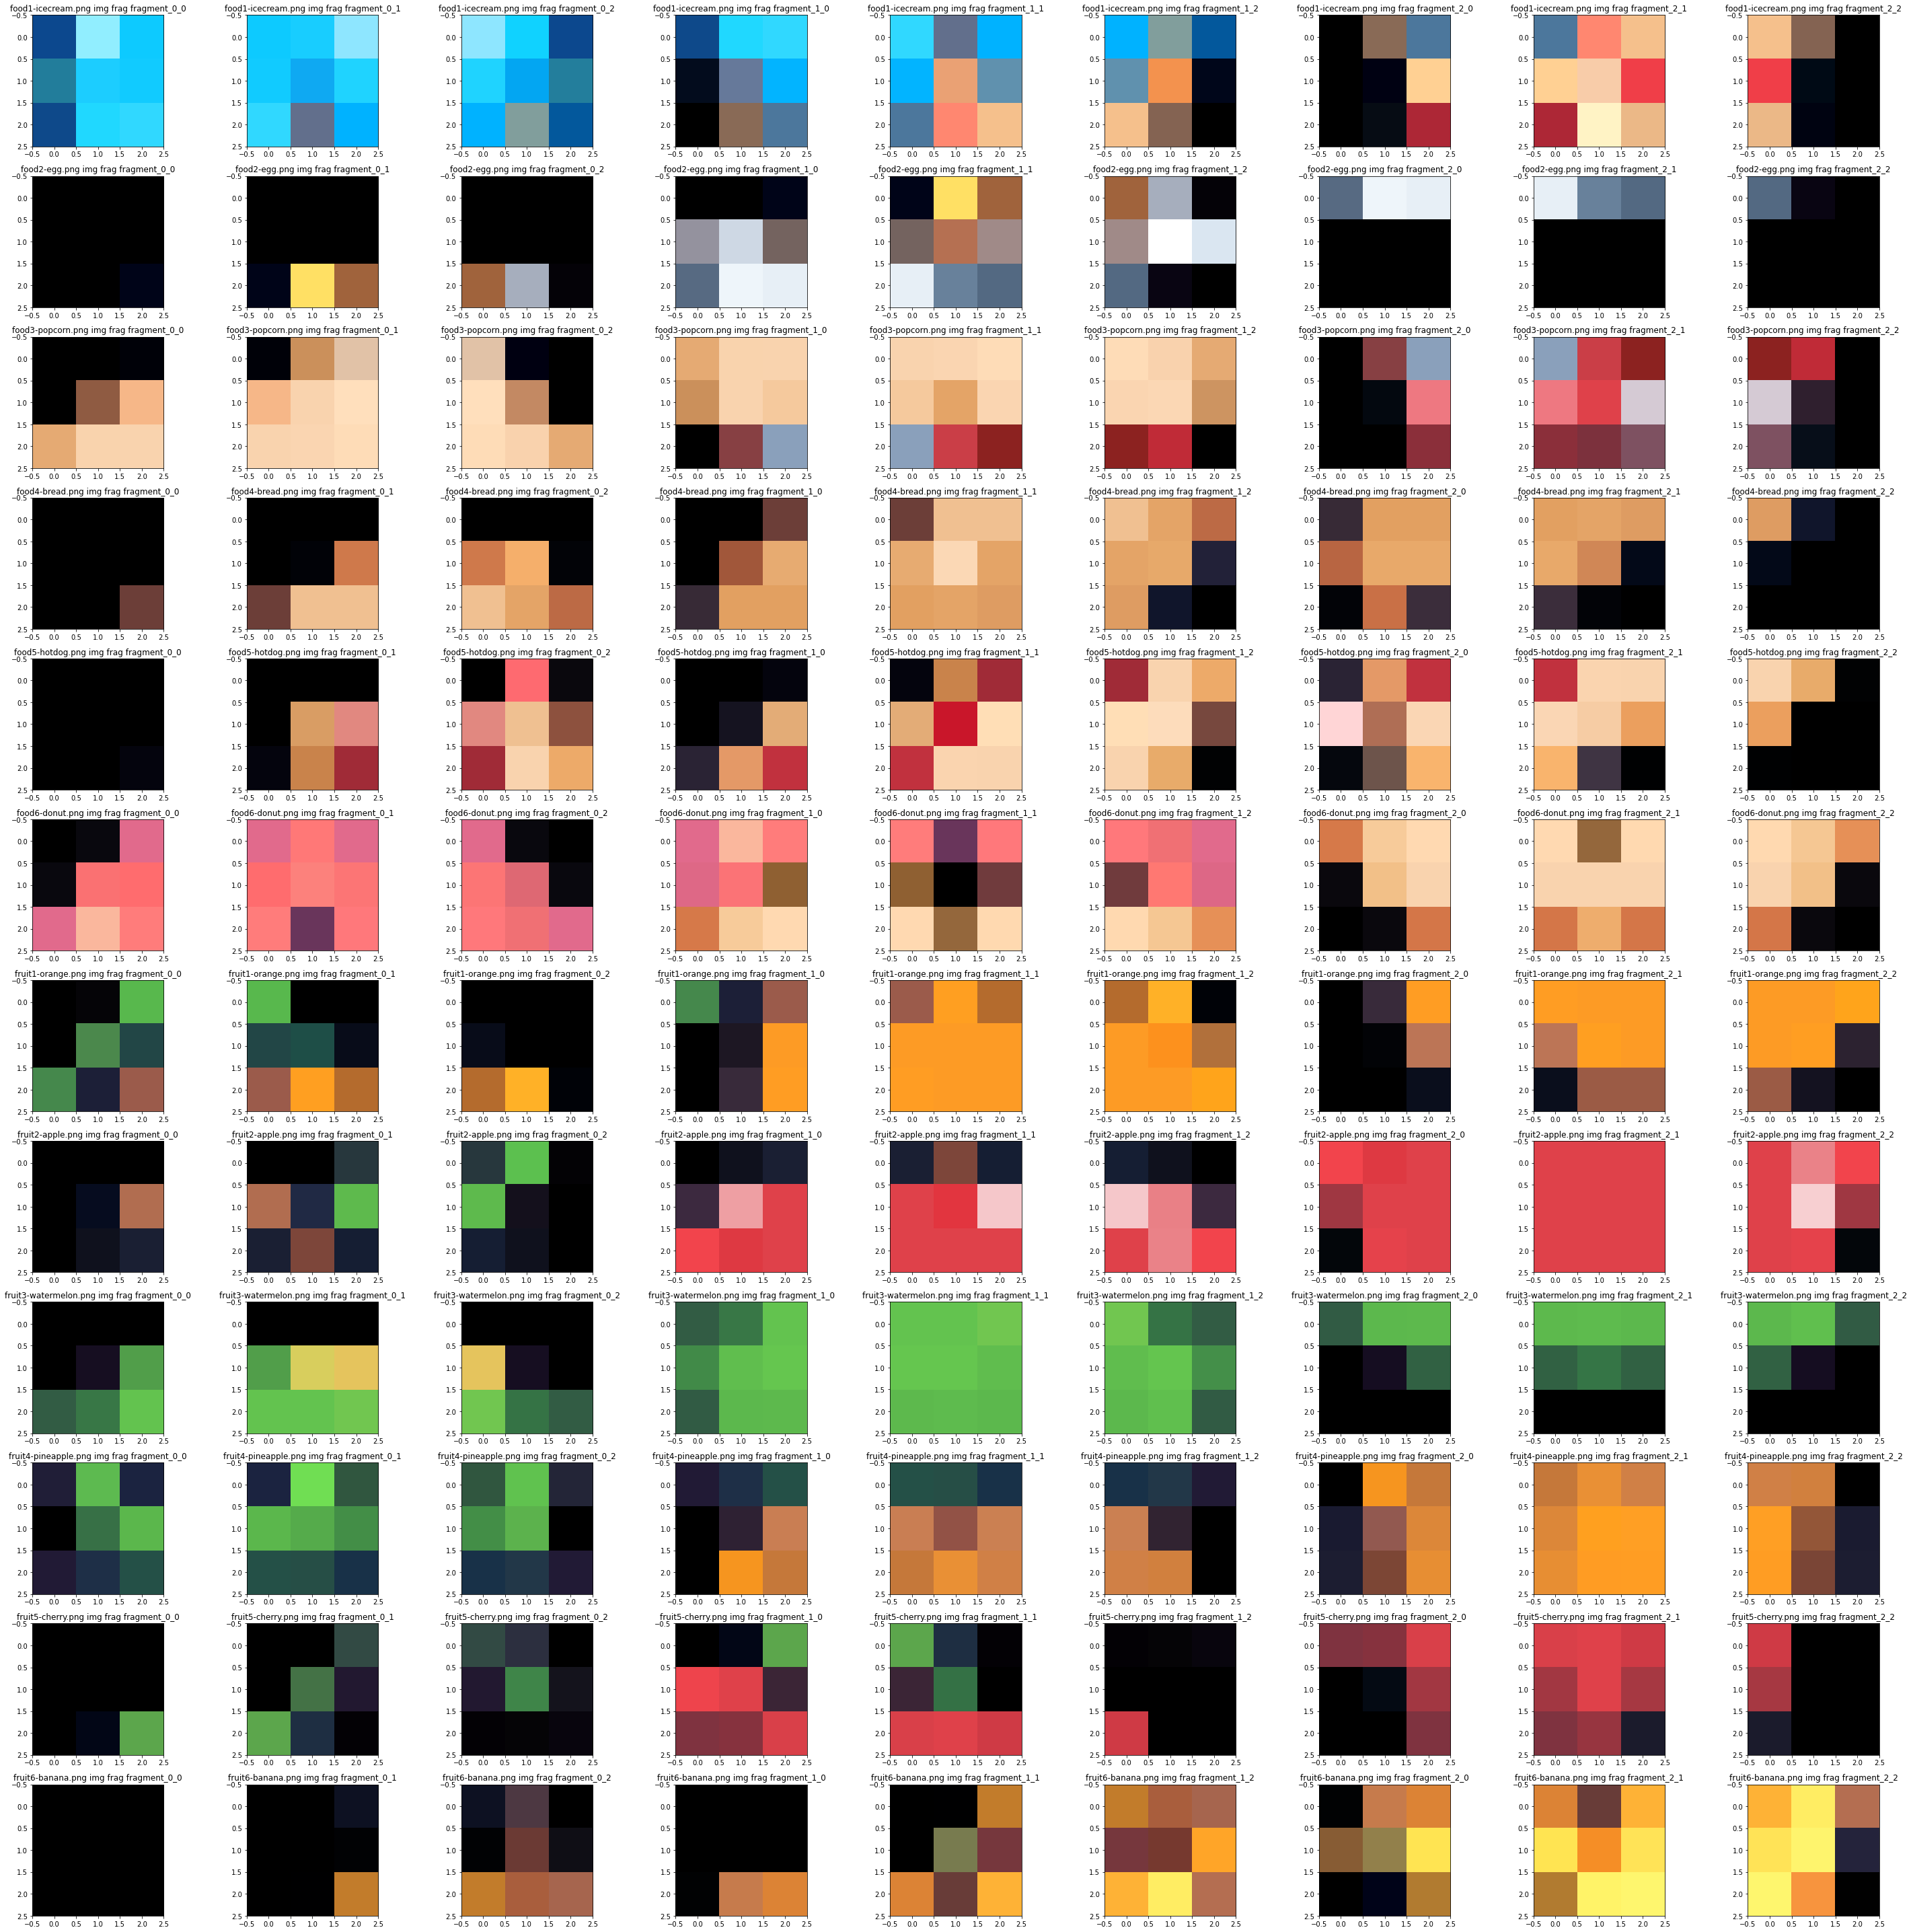

In [ ]:
%matplotlib inline
model.visualize_templates()

In [ ]:
model_path = 'log/fruitbot/nlev_500_easy/num-envs=64/trial01/model_final.pt'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
model_path1 = 'log/fruitbot/nlev_500_easy/bb=ppo+tmpv1grad_num-envs=32_si=50/trial01/model_final.pt'
state_dict = torch.load(model_path1, map_location=torch.device('cpu'))
model1.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
model_path2 = 'log/fruitbot/nlev_500_easy/bb=ppo+tmpv3_num-envs=32/trial01/model_final.pt'
state_dict = torch.load(model_path2, map_location=torch.device('cpu'))
model2.load_state_dict(state_dict)

<All keys matched successfully>

# Analyzing Performance

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# starting level 100, but only got the eprewmean (t1)


In [25]:
progress_baseline_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/template_init_layer-1/trial01/progress.csv')
progress_l0_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer0/progress.csv')
progress_l1_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1/progress.csv')
progress_l2_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer2/progress.csv')
progress_l3_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer3/progress.csv')
progress_l4_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4/progress.csv')
progress_l5_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer5/progress.csv')
progress_l6_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer6/progress.csv')
progress_l7_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer7/progress.csv')
progress_l8_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer8/progress.csv')
progress_l9_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer9/progress.csv')
progress_l10_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer10/progress.csv')
progress_l11_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11/progress.csv')
progress_l12_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer12/progress.csv')
progress_l13_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer13/progress.csv')
progress_l14_t1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14/progress.csv')

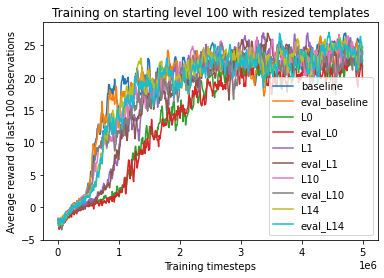

In [41]:
plt.plot(progress_baseline_t1['total_steps'], progress_baseline_t1['eprewmean'], label="baseline")
plt.plot(progress_baseline_t1['total_steps'], progress_baseline_t1['eval_eprewmean'], label="eval_baseline")

plt.plot(progress_l0_t1['total_steps'], progress_l0_t1['eprewmean'], label="L0")
plt.plot(progress_l0_t1['total_steps'], progress_l0_t1['eval_eprewmean'], label="eval_L0")

plt.plot(progress_l1_t1['total_steps'], progress_l1_t1['eprewmean'], label="L1")
plt.plot(progress_l1_t1['total_steps'], progress_l1_t1['eval_eprewmean'], label="eval_L1")

#plt.plot(progress_l2_t1['total_steps'], progress_l2_t1['eprewmean'], label="eprewmean_reg_l2")
#plt.plot(progress_l2_t1['total_steps'], progress_l2_t1['eval_eprewmean'], label="eval_eprewmean_reg_l2")

#plt.plot(progress_l3_t1['total_steps'], progress_l3_t1['eprewmean'], label="eprewmean_reg_l3")
#plt.plot(progress_l3_t1['total_steps'], progress_l3_t1['eval_eprewmean'], label="eval_eprewmean_reg_l3")

#plt.plot(progress_l4_t1['total_steps'], progress_l4_t1['eprewmean'], label="eprewmean_reg_l4")
#plt.plot(progress_l4_t1['total_steps'], progress_l4_t1['eval_eprewmean'], label="eval_eprewmean_reg_l4")

#plt.plot(progress_l5_t1['total_steps'], progress_l5_t1['eprewmean'], label="eprewmean_reg_l5")
#plt.plot(progress_l5_t1['total_steps'], progress_l5_t1['eval_eprewmean'], label="eval_eprewmean_reg_l5")

#plt.plot(progress_l6_t1['total_steps'], progress_l6_t1['eprewmean'], label="eprewmean_reg_l6")
#plt.plot(progress_l6_t1['total_steps'], progress_l6_t1['eval_eprewmean'], label="eval_eprewmean_reg_l6")

#plt.plot(progress_l7_t1['total_steps'], progress_l7_t1['eprewmean'], label="eprewmean_reg_l7")
#plt.plot(progress_l7_t1['total_steps'], progress_l7_t1['eval_eprewmean'], label="eval_eprewmean_reg_l7")

#plt.plot(progress_l8_t1['total_steps'], progress_l8_t1['eprewmean'], label="eprewmean_reg_l8")
#plt.plot(progress_l8_t1['total_steps'], progress_l8_t1['eval_eprewmean'], label="eval_eprewmean_reg_l8")

#plt.plot(progress_l9_t1['total_steps'], progress_l9_t1['eprewmean'], label="eprewmean_reg_l9")
#plt.plot(progress_l9_t1['total_steps'], progress_l9_t1['eval_eprewmean'], label="eval_eprewmean_reg_l9")

plt.plot(progress_l10_t1['total_steps'], progress_l10_t1['eprewmean'], label="L10")
plt.plot(progress_l10_t1['total_steps'], progress_l10_t1['eval_eprewmean'], label="eval_L10")

#plt.plot(progress_l11_t1['total_steps'], progress_l11_t1['eprewmean'], label="eprewmean_reg_l11")
#plt.plot(progress_l11_t1['total_steps'], progress_l11_t1['eval_eprewmean'], label="eval_eprewmean_reg_l11")

#plt.plot(progress_l12_t1['total_steps'], progress_l12_t1['eprewmean'], label="eprewmean_reg_l12")
#plt.plot(progress_l12_t1['total_steps'], progress_l12_t1['eval_eprewmean'], label="eval_eprewmean_reg_l12")

#plt.plot(progress_l13_t1['total_steps'], progress_l13_t1['eprewmean'], label="eprewmean_reg_l13")
#plt.plot(progress_l13_t1['total_steps'], progress_l13_t1['eval_eprewmean'], label="eval_eprewmean_reg_l13")

plt.plot(progress_l14_t1['total_steps'], progress_l14_t1['eprewmean'], label="L14")
plt.plot(progress_l14_t1['total_steps'], progress_l14_t1['eval_eprewmean'], label="eval_L14")

fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.title('Training on starting level 100 with resized templates')
plt.ylabel('Average reward of last 100 observations')
plt.xlabel('Training timesteps')
plt.legend()
plt.show()

# starting level 100

In [ ]:
progress_baseline = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/template_init_layer-1/trial01/progress.csv')
progress_l0 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer0_t2/progress.csv')
progress_l1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1_t2/progress.csv')
progress_l2 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer2_t2/progress.csv')
progress_l3 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer3_t2/progress.csv')
progress_l4 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4_t2/progress.csv')
progress_l5 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer5_t2/progress.csv')
progress_l6 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer6_t2/progress.csv')
progress_l7 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer7_t2/progress.csv')
progress_l8 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer8_t2/progress.csv')
progress_l9 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer9_t2/progress.csv')
progress_l10 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer10_t2/progress.csv')
progress_l11 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11_t2/progress.csv')
progress_l12 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer12_t2/progress.csv')
progress_l13 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer13_t2/progress.csv')
progress_l14 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14_t2/progress.csv')


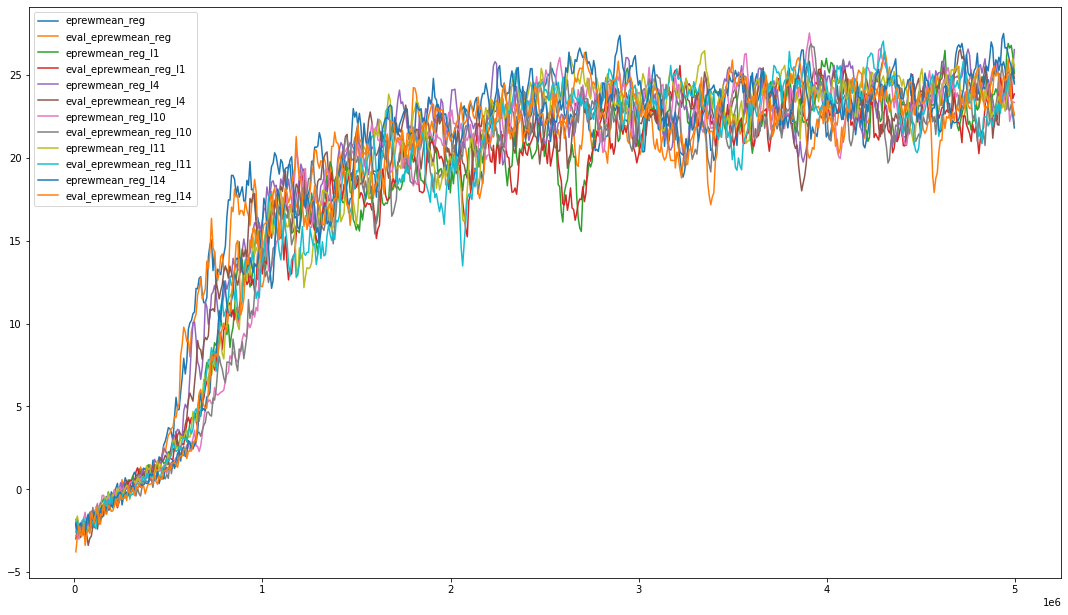

In [ ]:
plt.plot(progress_baseline['total_steps'], progress_baseline['eprewmean'], label="eprewmean_reg")
plt.plot(progress_baseline['total_steps'], progress_baseline['eval_eprewmean'], label="eval_eprewmean_reg")

#plt.plot(progress_l0['total_steps'], progress_l0['eprewmean'], label="eprewmean_reg_l0")
#plt.plot(progress_l0['total_steps'], progress_l0['eval_eprewmean'], label="eval_eprewmean_reg_l0")

plt.plot(progress_l1['total_steps'], progress_l1['eprewmean'], label="eprewmean_reg_l1")
plt.plot(progress_l1['total_steps'], progress_l1['eval_eprewmean'], label="eval_eprewmean_reg_l1")

#plt.plot(progress_l2['total_steps'], progress_l2['eprewmean'], label="eprewmean_reg_l2")
#plt.plot(progress_l2['total_steps'], progress_l2['eval_eprewmean'], label="eval_eprewmean_reg_l2")

#plt.plot(progress_l3['total_steps'], progress_l3['eprewmean'], label="eprewmean_reg_l3")
#plt.plot(progress_l3['total_steps'], progress_l3['eval_eprewmean'], label="eval_eprewmean_reg_l3")

plt.plot(progress_l4['total_steps'], progress_l4['eprewmean'], label="eprewmean_reg_l4")
plt.plot(progress_l4['total_steps'], progress_l4['eval_eprewmean'], label="eval_eprewmean_reg_l4")

#plt.plot(progress_l5['total_steps'], progress_l5['eprewmean'], label="eprewmean_reg_l5")
#plt.plot(progress_l5['total_steps'], progress_l5['eval_eprewmean'], label="eval_eprewmean_reg_l5")

#plt.plot(progress_l6['total_steps'], progress_l6['eprewmean'], label="eprewmean_reg_l6")
#plt.plot(progress_l6['total_steps'], progress_l6['eval_eprewmean'], label="eval_eprewmean_reg_l6")

#plt.plot(progress_l7['total_steps'], progress_l7['eprewmean'], label="eprewmean_reg_l7")
#plt.plot(progress_l7['total_steps'], progress_l7['eval_eprewmean'], label="eval_eprewmean_reg_l7")

#plt.plot(progress_l8['total_steps'], progress_l8['eprewmean'], label="eprewmean_reg_l8")
#plt.plot(progress_l8['total_steps'], progress_l8['eval_eprewmean'], label="eval_eprewmean_reg_l8")

#plt.plot(progress_l9['total_steps'], progress_l9['eprewmean'], label="eprewmean_reg_l9")
#plt.plot(progress_l9['total_steps'], progress_l9['eval_eprewmean'], label="eval_eprewmean_reg_l9")

plt.plot(progress_l10['total_steps'], progress_l10['eprewmean'], label="eprewmean_reg_l10")
plt.plot(progress_l10['total_steps'], progress_l10['eval_eprewmean'], label="eval_eprewmean_reg_l10")

plt.plot(progress_l11['total_steps'], progress_l11['eprewmean'], label="eprewmean_reg_l11")
plt.plot(progress_l11['total_steps'], progress_l11['eval_eprewmean'], label="eval_eprewmean_reg_l11")

#plt.plot(progress_l12['total_steps'], progress_l12['eprewmean'], label="eprewmean_reg_l12")
#plt.plot(progress_l12['total_steps'], progress_l12['eval_eprewmean'], label="eval_eprewmean_reg_l12")

#plt.plot(progress_l13['total_steps'], progress_l13['eprewmean'], label="eprewmean_reg_l13")
#plt.plot(progress_l13['total_steps'], progress_l13['eval_eprewmean'], label="eval_eprewmean_reg_l13")

plt.plot(progress_l14['total_steps'], progress_l14['eprewmean'], label="eprewmean_reg_l14")
plt.plot(progress_l14['total_steps'], progress_l14['eval_eprewmean'], label="eval_eprewmean_reg_l14")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

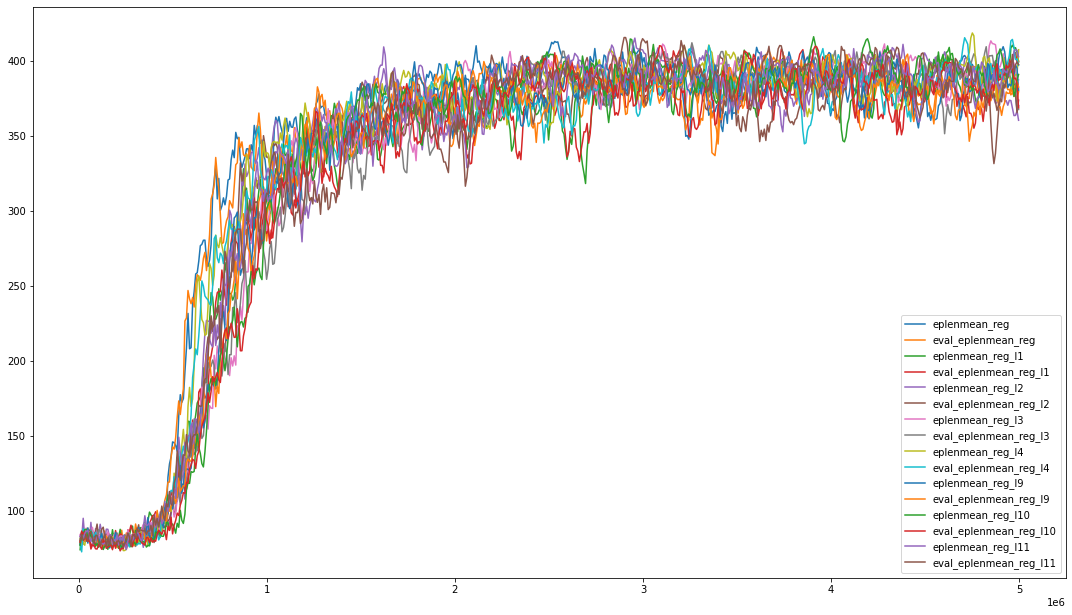

In [ ]:
plt.plot(progress_baseline['total_steps'], progress_baseline['eplenmean'], label="eplenmean_reg")
plt.plot(progress_baseline['total_steps'], progress_baseline['eval_eplenmean'], label="eval_eplenmean_reg")

#plt.plot(progress_l0['total_steps'], progress_l0['eplenmean'], label="eplenmean_reg_l0")
#plt.plot(progress_l0['total_steps'], progress_l0['eval_eplenmean'], label="eval_eplenmean_reg_l0")

plt.plot(progress_l1['total_steps'], progress_l1['eplenmean'], label="eplenmean_reg_l1")
plt.plot(progress_l1['total_steps'], progress_l1['eval_eplenmean'], label="eval_eplenmean_reg_l1")

plt.plot(progress_l2['total_steps'], progress_l2['eplenmean'], label="eplenmean_reg_l2")
plt.plot(progress_l2['total_steps'], progress_l2['eval_eplenmean'], label="eval_eplenmean_reg_l2")

plt.plot(progress_l3['total_steps'], progress_l3['eplenmean'], label="eplenmean_reg_l3")
plt.plot(progress_l3['total_steps'], progress_l3['eval_eplenmean'], label="eval_eplenmean_reg_l3")

plt.plot(progress_l4['total_steps'], progress_l4['eplenmean'], label="eplenmean_reg_l4")
plt.plot(progress_l4['total_steps'], progress_l4['eval_eplenmean'], label="eval_eplenmean_reg_l4")

#plt.plot(progress_l5['total_steps'], progress_l5['eplenmean'], label="eplenmean_reg_l5")
#plt.plot(progress_l5['total_steps'], progress_l5['eval_eplenmean'], label="eval_eplenmean_reg_l5")

#plt.plot(progress_l6['total_steps'], progress_l6['eplenmean'], label="eplenmean_reg_l6")
#plt.plot(progress_l6['total_steps'], progress_l6['eval_eplenmean'], label="eval_eplenmean_reg_l6")

#plt.plot(progress_l7['total_steps'], progress_l7['eplenmean'], label="eplenmean_reg_l7")
#plt.plot(progress_l7['total_steps'], progress_l7['eval_eplenmean'], label="eval_eplenmean_reg_l7")

#plt.plot(progress_l8['total_steps'], progress_l8['eplenmean'], label="eplenmean_reg_l8")
#plt.plot(progress_l8['total_steps'], progress_l8['eval_eplenmean'], label="eval_eplenmean_reg_l8")

plt.plot(progress_l9['total_steps'], progress_l9['eplenmean'], label="eplenmean_reg_l9")
plt.plot(progress_l9['total_steps'], progress_l9['eval_eplenmean'], label="eval_eplenmean_reg_l9")

plt.plot(progress_l10['total_steps'], progress_l10['eplenmean'], label="eplenmean_reg_l10")
plt.plot(progress_l10['total_steps'], progress_l10['eval_eplenmean'], label="eval_eplenmean_reg_l10")

plt.plot(progress_l11['total_steps'], progress_l11['eplenmean'], label="eplenmean_reg_l11")
plt.plot(progress_l11['total_steps'], progress_l11['eval_eplenmean'], label="eval_eplenmean_reg_l11")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

# some avg frob kernel changes on 100

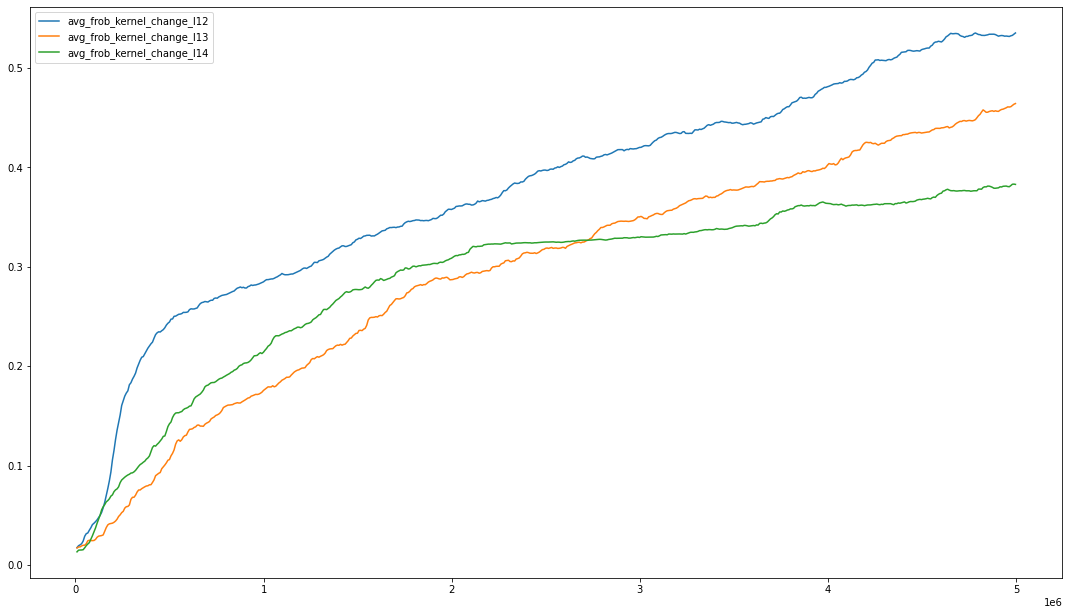

In [ ]:
plt.plot(progress_l12['total_steps'], progress_l12['avg_frob_kernel_change'], label="avg_frob_kernel_change_l12")
plt.plot(progress_l13['total_steps'], progress_l13['avg_frob_kernel_change'], label="avg_frob_kernel_change_l13")
plt.plot(progress_l14['total_steps'], progress_l14['avg_frob_kernel_change'], label="avg_frob_kernel_change_l14")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

# starting level 250 (also with kernel frob norms)


In [6]:
progress_baseline_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer-1_kernelfrob_sl250/progress.csv')
progress_l0_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer0_kernelfrob_sl250/progress.csv')
progress_l1_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1_kernelfrob_sl250/progress.csv')
progress_l2_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer2_kernelfrob_sl250/progress.csv')
progress_l4_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4_kernelfrob_sl250/progress.csv')
progress_l6_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer6_kernelfrob_sl250/progress.csv')
progress_l9_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer9_kernelfrob_sl250/progress.csv')
progress_l11_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11_kernelfrob_sl250/progress.csv')
progress_l14_250 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14_kernelfrob_sl250/progress.csv')

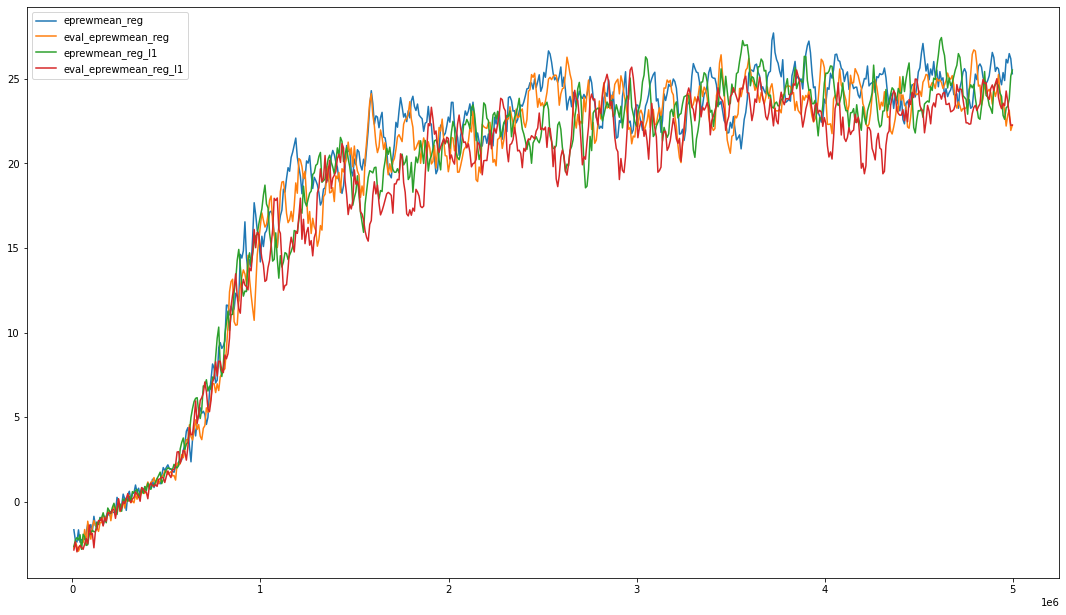

In [7]:
plt.plot(progress_baseline_250['total_steps'], progress_baseline_250['eprewmean'], label="eprewmean_reg")
plt.plot(progress_baseline_250['total_steps'], progress_baseline_250['eval_eprewmean'], label="eval_eprewmean_reg")

#plt.plot(progress_l0_250['total_steps'], progress_l0_250['eprewmean'], label="eprewmean_reg_l0")
#plt.plot(progress_l0_250['total_steps'], progress_l0_250['eval_eprewmean'], label="eval_eprewmean_reg_l0")

plt.plot(progress_l1_250['total_steps'], progress_l1_250['eprewmean'], label="eprewmean_reg_l1")
plt.plot(progress_l1_250['total_steps'], progress_l1_250['eval_eprewmean'], label="eval_eprewmean_reg_l1")

#plt.plot(progress_l2_250['total_steps'], progress_l2_250['eprewmean'], label="eprewmean_reg_l2")
#plt.plot(progress_l2_250['total_steps'], progress_l2_250['eval_eprewmean'], label="eval_eprewmean_reg_l2")

#plt.plot(progress_l4_250['total_steps'], progress_l4_250['eprewmean'], label="eprewmean_reg_l4")
#plt.plot(progress_l4_250['total_steps'], progress_l4_250['eval_eprewmean'], label="eval_eprewmean_reg_l4")

#plt.plot(progress_l6_250['total_steps'], progress_l6_250['eprewmean'], label="eprewmean_reg_l6")
#plt.plot(progress_l6_250['total_steps'], progress_l6_250['eval_eprewmean'], label="eval_eprewmean_reg_l6")

#plt.plot(progress_l9_250['total_steps'], progress_l9_250['eprewmean'], label="eprewmean_reg_l9")
#plt.plot(progress_l9_250['total_steps'], progress_l9_250['eval_eprewmean'], label="eval_eprewmean_reg_l9")

#plt.plot(progress_l11_250['total_steps'], progress_l11_250['eprewmean'], label="eprewmean_reg_l11")
#plt.plot(progress_l11_250['total_steps'], progress_l11_250['eval_eprewmean'], label="eval_eprewmean_reg_l11")

#plt.plot(progress_l14_250['total_steps'], progress_l14_250['eprewmean'], label="eprewmean_reg_l14")
#plt.plot(progress_l14_250['total_steps'], progress_l14_250['eval_eprewmean'], label="eval_eprewmean_reg_l14")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

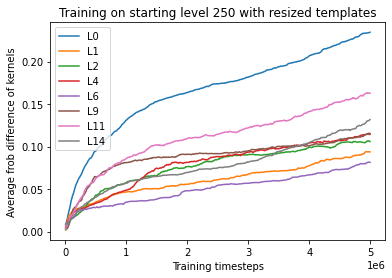

In [10]:
#plt.plot(progress_baseline_250['total_steps'], progress_baseline_250['avg_frob_kernel_diff_layer0'], label="avg_frob_kernel_diff_layer0_baseline")
#plt.plot(progress_baseline_250['total_steps'], progress_baseline_250['avg_frob_kernel_diff_layer1'], label="avg_frob_kernel_diff_layer1_baseline")

plt.plot(progress_l0_250['total_steps'], progress_l0_250['avg_frob_kernel_diff_layer0'], label="L0")
plt.plot(progress_l1_250['total_steps'], progress_l1_250['avg_frob_kernel_diff_layer1'], label="L1")
plt.plot(progress_l2_250['total_steps'], progress_l2_250['avg_frob_kernel_diff_layer2'], label="L2")
plt.plot(progress_l4_250['total_steps'], progress_l4_250['avg_frob_kernel_diff_layer4'], label="L4")
plt.plot(progress_l6_250['total_steps'], progress_l6_250['avg_frob_kernel_diff_layer6'], label="L6")
plt.plot(progress_l9_250['total_steps'], progress_l9_250['avg_frob_kernel_diff_layer9'], label="L9")
plt.plot(progress_l11_250['total_steps'], progress_l11_250['avg_frob_kernel_diff_layer11'], label="L11")
plt.plot(progress_l14_250['total_steps'], progress_l14_250['avg_frob_kernel_diff_layer14'], label="L14")


fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.title('Training on starting level 250 with resized templates')
plt.ylabel('Average frob difference of kernels')
plt.xlabel('Training timesteps')
plt.legend()
plt.show()

# starting level 50

In [12]:
progress_baseline_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer-1_kernelfrob_sl50/progress.csv')
progress_l0_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer0_kernelfrob_sl50/progress.csv')
progress_l1_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1_kernelfrob_sl50/progress.csv')
progress_l4_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4_kernelfrob_sl50/progress.csv')
progress_l11_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11_kernelfrob_sl50/progress.csv')
progress_l14_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14_kernelfrob_sl50/progress.csv')

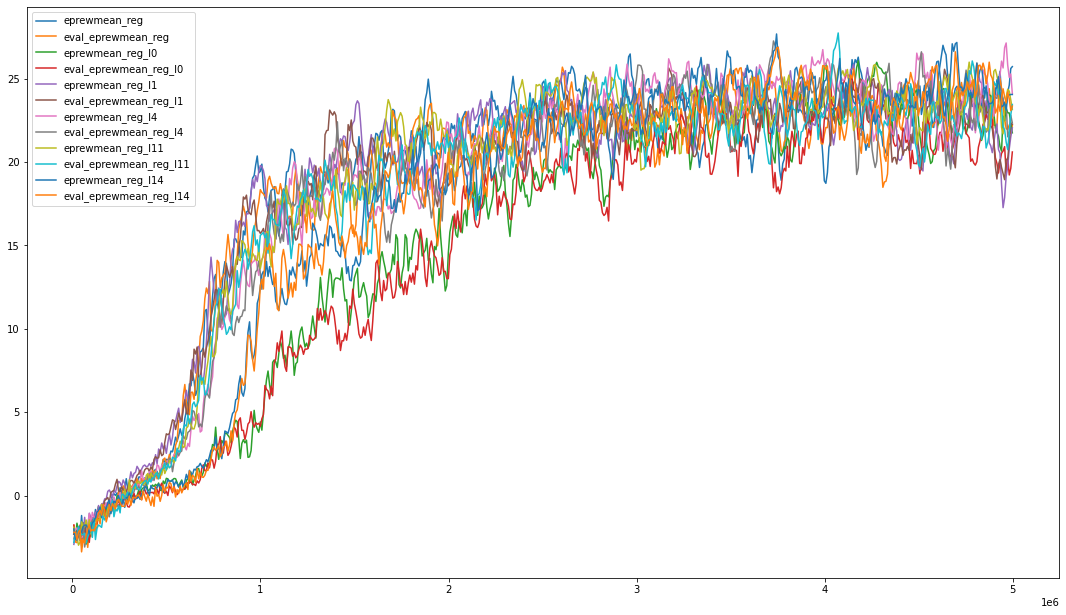

In [ ]:
plt.plot(progress_baseline_50['total_steps'], progress_baseline_50['eprewmean'], label="eprewmean_reg")
plt.plot(progress_baseline_50['total_steps'], progress_baseline_50['eval_eprewmean'], label="eval_eprewmean_reg")

plt.plot(progress_l0_50['total_steps'], progress_l0_50['eprewmean'], label="eprewmean_reg_l0")
plt.plot(progress_l0_50['total_steps'], progress_l0_50['eval_eprewmean'], label="eval_eprewmean_reg_l0")

plt.plot(progress_l1_50['total_steps'], progress_l1_50['eprewmean'], label="eprewmean_reg_l1")
plt.plot(progress_l1_50['total_steps'], progress_l1_50['eval_eprewmean'], label="eval_eprewmean_reg_l1")

plt.plot(progress_l4_50['total_steps'], progress_l4_50['eprewmean'], label="eprewmean_reg_l4")
plt.plot(progress_l4_50['total_steps'], progress_l4_50['eval_eprewmean'], label="eval_eprewmean_reg_l4")

plt.plot(progress_l11_50['total_steps'], progress_l11_50['eprewmean'], label="eprewmean_reg_l11")
plt.plot(progress_l11_50['total_steps'], progress_l11_50['eval_eprewmean'], label="eval_eprewmean_reg_l11")

plt.plot(progress_l14_50['total_steps'], progress_l14_50['eprewmean'], label="eprewmean_reg_l14")
plt.plot(progress_l14_50['total_steps'], progress_l14_50['eval_eprewmean'], label="eval_eprewmean_reg_l14")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

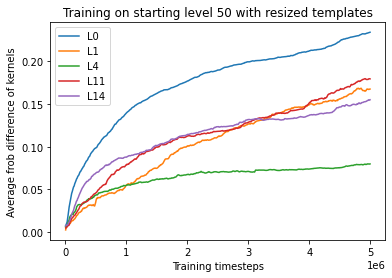

In [13]:
plt.plot(progress_l0_50['total_steps'], progress_l0_50['avg_frob_kernel_diff_layer0'], label="L0")
plt.plot(progress_l1_50['total_steps'], progress_l1_50['avg_frob_kernel_diff_layer1'], label="L1")
plt.plot(progress_l4_50['total_steps'], progress_l4_50['avg_frob_kernel_diff_layer4'], label="L4")
plt.plot(progress_l11_50['total_steps'], progress_l11_50['avg_frob_kernel_diff_layer11'], label="L11")
plt.plot(progress_l14_50['total_steps'], progress_l14_50['avg_frob_kernel_diff_layer14'], label="L14")

fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.title('Training on starting level 50 with resized templates')
plt.ylabel('Average frob difference of kernels')
plt.xlabel('Training timesteps')
plt.legend()
plt.show()

# setting all inputs to a template, sl 50


In [43]:
progress_baseline_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer-1_kernelfrob_sl50/progress.csv')
progress_l1_50_all = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1_initallinputs_sl50/progress.csv')
progress_l2_50_all = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer2_initallinputs_sl50/progress.csv')
progress_l4_50_all = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4_initallinputs_sl50/progress.csv')
progress_l9_50_all = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer9_initallinputs_sl50/progress.csv')
progress_l11_50_all = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11_initallinputs_sl50/progress.csv')
progress_l14_50_all = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14_initallinputs_sl50/progress.csv')

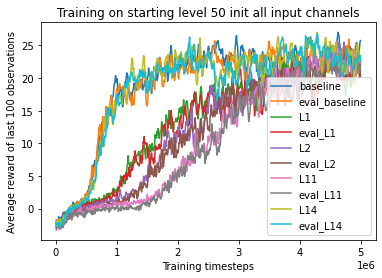

In [46]:
plt.plot(progress_baseline_50['total_steps'], progress_baseline_50['eprewmean'], label="baseline")
plt.plot(progress_baseline_50['total_steps'], progress_baseline_50['eval_eprewmean'], label="eval_baseline")

plt.plot(progress_l1_50_all['total_steps'], progress_l1_50_all['eprewmean'], label="L1")
plt.plot(progress_l1_50_all['total_steps'], progress_l1_50_all['eval_eprewmean'], label="eval_L1")

plt.plot(progress_l2_50_all['total_steps'], progress_l2_50_all['eprewmean'], label="L2")
plt.plot(progress_l2_50_all['total_steps'], progress_l2_50_all['eval_eprewmean'], label="eval_L2")

#plt.plot(progress_l4_50_all['total_steps'], progress_l4_50_all['eprewmean'], label="eprewmean_reg_l4")
#plt.plot(progress_l4_50_all['total_steps'], progress_l4_50_all['eval_eprewmean'], label="eval_eprewmean_reg_l4")

#plt.plot(progress_l9_50_all['total_steps'], progress_l9_50_all['eprewmean'], label="eprewmean_reg_l9")
#plt.plot(progress_l9_50_all['total_steps'], progress_l9_50_all['eval_eprewmean'], label="eval_eprewmean_reg_l9")

plt.plot(progress_l11_50_all['total_steps'], progress_l11_50_all['eprewmean'], label="L11")
plt.plot(progress_l11_50_all['total_steps'], progress_l11_50_all['eval_eprewmean'], label="eval_L11")

plt.plot(progress_l14_50_all['total_steps'], progress_l14_50_all['eprewmean'], label="L14")
plt.plot(progress_l14_50_all['total_steps'], progress_l14_50_all['eval_eprewmean'], label="eval_L14")

fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.title('Training on starting level 50 init all input channels')
plt.ylabel('Average reward of last 100 observations')
plt.xlabel('Training timesteps')

plt.legend()
plt.show()

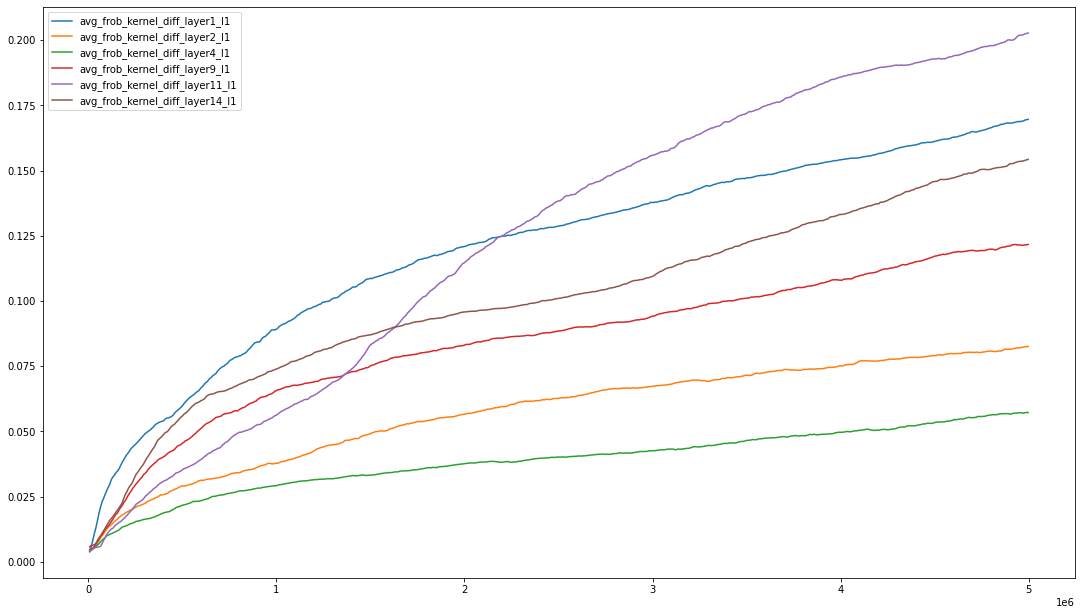

In [ ]:
plt.plot(progress_l1_50_all['total_steps'], progress_l1_50_all['avg_frob_kernel_diff_layer1'], label="avg_frob_kernel_diff_layer1_l1")
plt.plot(progress_l2_50_all['total_steps'], progress_l2_50_all['avg_frob_kernel_diff_layer2'], label="avg_frob_kernel_diff_layer2_l1")
plt.plot(progress_l4_50_all['total_steps'], progress_l4_50_all['avg_frob_kernel_diff_layer4'], label="avg_frob_kernel_diff_layer4_l1")
plt.plot(progress_l9_50_all['total_steps'], progress_l9_50_all['avg_frob_kernel_diff_layer9'], label="avg_frob_kernel_diff_layer9_l1")
plt.plot(progress_l11_50_all['total_steps'], progress_l11_50_all['avg_frob_kernel_diff_layer11'], label="avg_frob_kernel_diff_layer11_l1")
plt.plot(progress_l14_50_all['total_steps'], progress_l14_50_all['avg_frob_kernel_diff_layer14'], label="avg_frob_kernel_diff_layer14_l1")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

# fragmentation attempts (sl 50)

In [48]:
progress_baseline_50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer-1_kernelfrob_sl50/progress.csv')
progress_l1_frag = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1_fragment/progress.csv')
progress_l2_frag = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer2_fragment/progress.csv')
progress_l4_frag = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4_fragment/progress.csv')
progress_l9_frag = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer9_fragment/progress.csv')
progress_l11_frag = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11_fragment/progress.csv')
progress_l14_frag = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14_fragment/progress.csv')


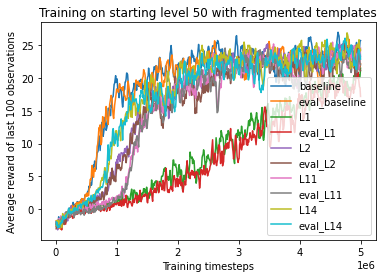

In [50]:
plt.plot(progress_baseline_50['total_steps'], progress_baseline_50['eprewmean'], label="baseline")
plt.plot(progress_baseline_50['total_steps'], progress_baseline_50['eval_eprewmean'], label="eval_baseline")

plt.plot(progress_l1_frag['total_steps'], progress_l1_frag['eprewmean'], label="L1")
plt.plot(progress_l1_frag['total_steps'], progress_l1_frag['eval_eprewmean'], label="eval_L1")

plt.plot(progress_l2_frag['total_steps'], progress_l2_frag['eprewmean'], label="L2")
plt.plot(progress_l2_frag['total_steps'], progress_l2_frag['eval_eprewmean'], label="eval_L2")

#plt.plot(progress_l4_frag['total_steps'], progress_l4_frag['eprewmean'], label="eprewmean_reg_l4")
#plt.plot(progress_l4_frag['total_steps'], progress_l4_frag['eval_eprewmean'], label="eval_eprewmean_reg_l4")

#plt.plot(progress_l9_frag['total_steps'], progress_l9_frag['eprewmean'], label="eprewmean_reg_l9")
#plt.plot(progress_l9_frag['total_steps'], progress_l9_frag['eval_eprewmean'], label="eval_eprewmean_reg_l9")

plt.plot(progress_l11_frag['total_steps'], progress_l11_frag['eprewmean'], label="L11")
plt.plot(progress_l11_frag['total_steps'], progress_l11_frag['eval_eprewmean'], label="eval_L11")

plt.plot(progress_l14_frag['total_steps'], progress_l14_frag['eprewmean'], label="L14")
plt.plot(progress_l14_frag['total_steps'], progress_l14_frag['eval_eprewmean'], label="eval_L14")

fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.title('Training on starting level 50 with fragmented templates')
plt.ylabel('Average reward of last 100 observations')
plt.xlabel('Training timesteps')
plt.legend()
plt.show()

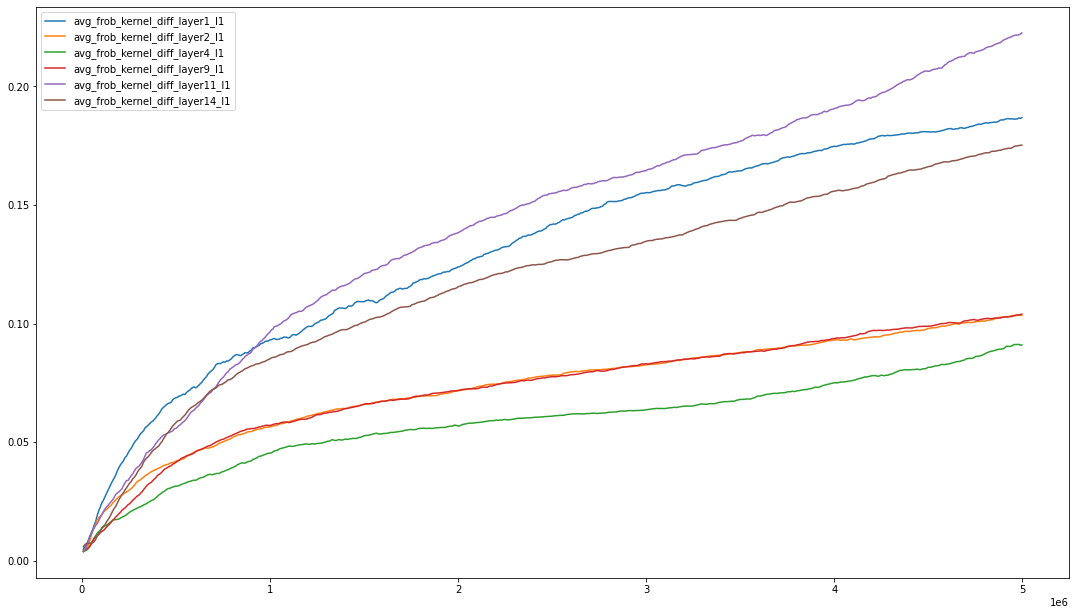

In [ ]:
plt.plot(progress_l1_frag['total_steps'], progress_l1_frag['avg_frob_kernel_diff_layer1'], label="avg_frob_kernel_diff_layer1_l1")
plt.plot(progress_l2_frag['total_steps'], progress_l2_frag['avg_frob_kernel_diff_layer2'], label="avg_frob_kernel_diff_layer2_l1")
plt.plot(progress_l4_frag['total_steps'], progress_l4_frag['avg_frob_kernel_diff_layer4'], label="avg_frob_kernel_diff_layer4_l1")
plt.plot(progress_l9_frag['total_steps'], progress_l9_frag['avg_frob_kernel_diff_layer9'], label="avg_frob_kernel_diff_layer9_l1")
plt.plot(progress_l11_frag['total_steps'], progress_l11_frag['avg_frob_kernel_diff_layer11'], label="avg_frob_kernel_diff_layer11_l1")
plt.plot(progress_l14_frag['total_steps'], progress_l14_frag['avg_frob_kernel_diff_layer14'], label="avg_frob_kernel_diff_layer14_l1")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.legend()
plt.show()

# starting level 500 training (resize, were not doing any more fragment)

In [9]:
progress_baseline_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer-1_sl500/progress.csv')
progress_l0_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer0_sl500/progress.csv')
progress_l1_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer1_sl500/progress.csv')
progress_l2_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer2_sl500/progress.csv')
progress_l4_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer4_sl500/progress.csv')
progress_l5_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer5_sl500/progress.csv')
progress_l9_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer9_sl500/progress.csv')
progress_l11_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer11_sl500/progress.csv')
progress_l14_500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init/layer14_sl500/progress.csv')

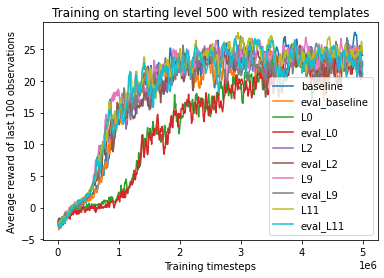

In [39]:
plt.plot(progress_baseline_500['total_steps'], progress_baseline_500['eprewmean'], label="baseline")
plt.plot(progress_baseline_500['total_steps'], progress_baseline_500['eval_eprewmean'], label="eval_baseline")

plt.plot(progress_l0_500['total_steps'], progress_l0_500['eprewmean'], label="L0")
plt.plot(progress_l0_500['total_steps'], progress_l0_500['eval_eprewmean'], label="eval_L0")

#plt.plot(progress_l1_500['total_steps'], progress_l1_500['eprewmean'], label="eprewmean_reg_l1")
#plt.plot(progress_l1_500['total_steps'], progress_l1_500['eval_eprewmean'], label="eval_eprewmean_reg_l1")

plt.plot(progress_l2_500['total_steps'], progress_l2_500['eprewmean'], label="L2")
plt.plot(progress_l2_500['total_steps'], progress_l2_500['eval_eprewmean'], label="eval_L2")

#plt.plot(progress_l4_500['total_steps'], progress_l4_500['eprewmean'], label="eprewmean_reg_l4")
#plt.plot(progress_l4_500['total_steps'], progress_l4_500['eval_eprewmean'], label="eval_eprewmean_reg_l4")

#plt.plot(progress_l5_500['total_steps'], progress_l5_500['eprewmean'], label="eprewmean_reg_l5")
#plt.plot(progress_l5_500['total_steps'], progress_l5_500['eval_eprewmean'], label="eval_eprewmean_reg_l5")

plt.plot(progress_l9_500['total_steps'], progress_l9_500['eprewmean'], label="L9")
plt.plot(progress_l9_500['total_steps'], progress_l9_500['eval_eprewmean'], label="eval_L9")

plt.plot(progress_l11_500['total_steps'], progress_l11_500['eprewmean'], label="L11")
plt.plot(progress_l11_500['total_steps'], progress_l11_500['eval_eprewmean'], label="eval_L11")

#plt.plot(progress_l14_500['total_steps'], progress_l14_500['eprewmean'], label="eprewmean_reg_l14")
#plt.plot(progress_l14_500['total_steps'], progress_l14_500['eval_eprewmean'], label="eval_eprewmean_reg_l14")

fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.title('Training on starting level 500 with resized templates')
plt.ylabel('Average reward of last 100 observations')
plt.xlabel('Training timesteps')

plt.legend()
plt.show()

# test analysis

12.161577759950386
12.457415032420032


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


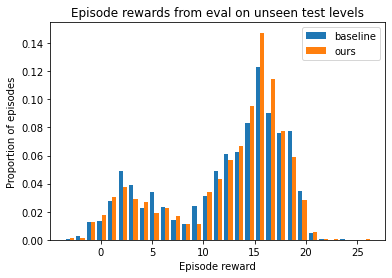

In [30]:
eval_baseline_1000 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer-1_sl500_eval1000/progress.csv')
eval_baseline_1500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer-1_sl500_eval1500/progress.csv')
eval_baseline_2000 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer-1_sl500_eval2000/progress.csv')
eval_baseline_2500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer-1_sl500_eval2500/progress.csv')

all_eval_baseline = np.vstack((eval_baseline_1000, eval_baseline_1500, eval_baseline_2000, eval_baseline_2500))

eval_ours_1000 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer14_sl500_eval1000/progress.csv')
eval_ours_1500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer14_sl500_eval1500/progress.csv')
eval_ours_2000 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer14_sl500_eval2000/progress.csv')
eval_ours_2500 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/ortho_template_init_eval/layer14_sl500_eval2500/progress.csv')

all_eval_ours = np.vstack((eval_ours_1000, eval_ours_1500, eval_ours_2000, eval_ours_2500))

print(np.mean(all_eval_baseline))
print(np.mean(all_eval_ours))

plt.title('Episode rewards from eval on unseen test levels')
#plt.hist(all_eval_baseline, bins='auto', label='baseline', density=True)
#plt.hist(all_eval_ours, bins='auto', label='ours', density=True)

plt.hist([all_eval_baseline, all_eval_ours], bins='auto', label=['baseline', 'ours'], density=True)

plt.ylabel('Proportion of episodes')
plt.xlabel('Episode reward')

plt.legend()
plt.show()